In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


In [2]:
xl = pd.ExcelFile('20190927_HeartSurvey_edited.xlsx')
survey = xl.parse("Sheet1")
survey.head()

,Duration (in seconds),RecordedDate,ResponseId,Q2.1,Q2.2,Q2.3,Q4.2_1,Q4.3,Q5.2_1,Q5.3,...,Q69.1_2,Q69.1_3,Q69.1_4,Q69.1_5,Q69.1_6,Q69.1_7,Q69.1_8,Q69.1_9,Q69.1_10,Q69.2_1
0,10106,2019-09-11 16:40:00,R_32XStqqXgBnksiC,Physician,20-24 years,20-24 years,0,Yes,100,No,...,NaN,NaN,Number 3,Number 2,NaN,NaN,NaN,Number 4,Number 1,Highly Risk Tolerant
1,4925,2019-09-11 16:40:00,R_2bTotYExBytoNpf,Physician,0-4 years,0-4 years,9,Yes,49,No,...,NaN,NaN,NaN,Number 4,Number 2,Number 1,NaN,NaN,Number 3,Neutral
2,10386,2019-09-11 16:40:00,R_28HubDeTQcBnH6b,Physician,0-4 years,0-4 years,0,Yes,100,No,...,NaN,Number 2,NaN,Number 3,NaN,NaN,NaN,Number 4,Number 5,Neutral
3,10243,2019-09-11 16:40:00,R_3rZnt5JFNJxWU8U,Physician,5-9 years,5-9 years,10,Yes,100,No,...,NaN,Number 5,Number 4,Number 3,NaN,NaN,NaN,NaN,Number 2,Neutral
4,10723,2019-09-11 16:41:00,R_8CzCYLAwaFnUdcR,Physician,20-24 years,20-24 years,8,Yes,99,No,...,NaN,NaN,Number 3,Number 4,NaN,Number 5,NaN,NaN,Number 2,Somewhat Risk Averse


In [3]:
## Extract risk data to its own dataframe

risk = survey.iloc[:, 10:130:2].fillna(50) ## All the actual questions, risk value
risk.head()

,Q7.2_1,Q8.2_1,Q9.2_1,Q10.2_1,Q11.2_1,Q12.2_1,Q13.2_1,Q14.2_1,Q15.2_1,Q16.2_1,...,Q58.2_1,Q59.2_1,Q60.2_1,Q61.2_1,Q62.2_1,Q63.2_1,Q64.2_1,Q65.2_1,Q66.2_1,Q67.2_1
0,50.0,92,63.0,0,100.0,40.0,100,0,71,97.0,...,89,40.0,100,100,77,66.0,84,15,70.0,86.0
1,77.0,100,62.0,7,50.0,50.0,80,14,98,87.0,...,83,71.0,100,94,90,80.0,100,11,79.0,82.0
2,41.0,82,35.0,6,61.0,46.0,69,5,75,57.0,...,72,54.0,94,82,73,72.0,90,24,59.0,77.0
3,59.0,100,50.0,0,90.0,60.0,96,15,88,79.0,...,76,38.0,92,74,92,50.0,85,13,50.0,50.0
4,68.0,81,58.0,3,88.0,16.0,77,15,78,75.0,...,84,76.0,92,88,86,81.0,91,31,74.0,71.0


In [4]:
## Rename columns for risk dataframe

risk.columns = [i for i in range(60)]
risk.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,50.0,92,63.0,0,100.0,40.0,100,0,71,97.0,...,89,40.0,100,100,77,66.0,84,15,70.0,86.0
1,77.0,100,62.0,7,50.0,50.0,80,14,98,87.0,...,83,71.0,100,94,90,80.0,100,11,79.0,82.0
2,41.0,82,35.0,6,61.0,46.0,69,5,75,57.0,...,72,54.0,94,82,73,72.0,90,24,59.0,77.0
3,59.0,100,50.0,0,90.0,60.0,96,15,88,79.0,...,76,38.0,92,74,92,50.0,85,13,50.0,50.0
4,68.0,81,58.0,3,88.0,16.0,77,15,78,75.0,...,84,76.0,92,88,86,81.0,91,31,74.0,71.0


In [5]:
## Extract waitlist decision data to its own dataframe

waitlist = survey.iloc[:, 11:130:2] ## All the actual questions, risk value
waitlist.head()

,Q7.3,Q8.3,Q9.3,Q10.3,Q11.3,Q12.3,Q13.3,Q14.3,Q15.3,Q16.3,...,Q58.3,Q59.3,Q60.3,Q61.3,Q62.3,Q63.3,Q64.3,Q65.3,Q66.3,Q67.3
0,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
1,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
2,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
3,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes


In [6]:
## Rename waitlist decision columns to match the risk columns

waitlist.columns = [i for i in range(60)]
waitlist.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
1,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
2,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
3,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes


Text(0.5, 0, 'Risk Score')

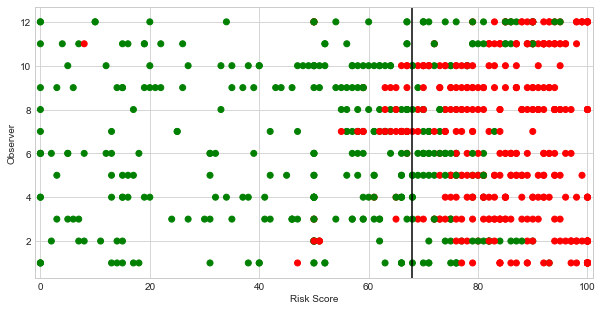

In [7]:
# Test plot of scenario 11
plt.rcParams['figure.figsize'] = [10, 5]
question = 11
y = risk.index.values + 1
colors = waitlist
colors[colors == 'Yes'] = 'green'
colors[colors == 'No'] = 'red'

for question in range(60):
    x = risk[question]
    x_mean = risk[question].mean()
    plt.scatter(x, y, marker='o', color=colors[question])
plt.axvline(x=risk.mean().mean(), color='black')
plt.xlim(-1, 101)
plt.ylabel('Observer')
plt.xlabel('Risk Score')
# risk.mean().mean()

In [8]:
## Change Yes/No to green/red, for use in the graphs

waitlist[waitlist == 'Yes'] = 'green'
waitlist[waitlist == 'No'] = 'red'
waitlist.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,green,red,green,green,red,green,red,green,green,red,...,red,green,red,red,red,green,red,green,green,red
1,green,red,green,green,red,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,red
2,green,red,green,green,green,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,red
3,green,red,green,green,red,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,green
4,green,red,green,green,red,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,green


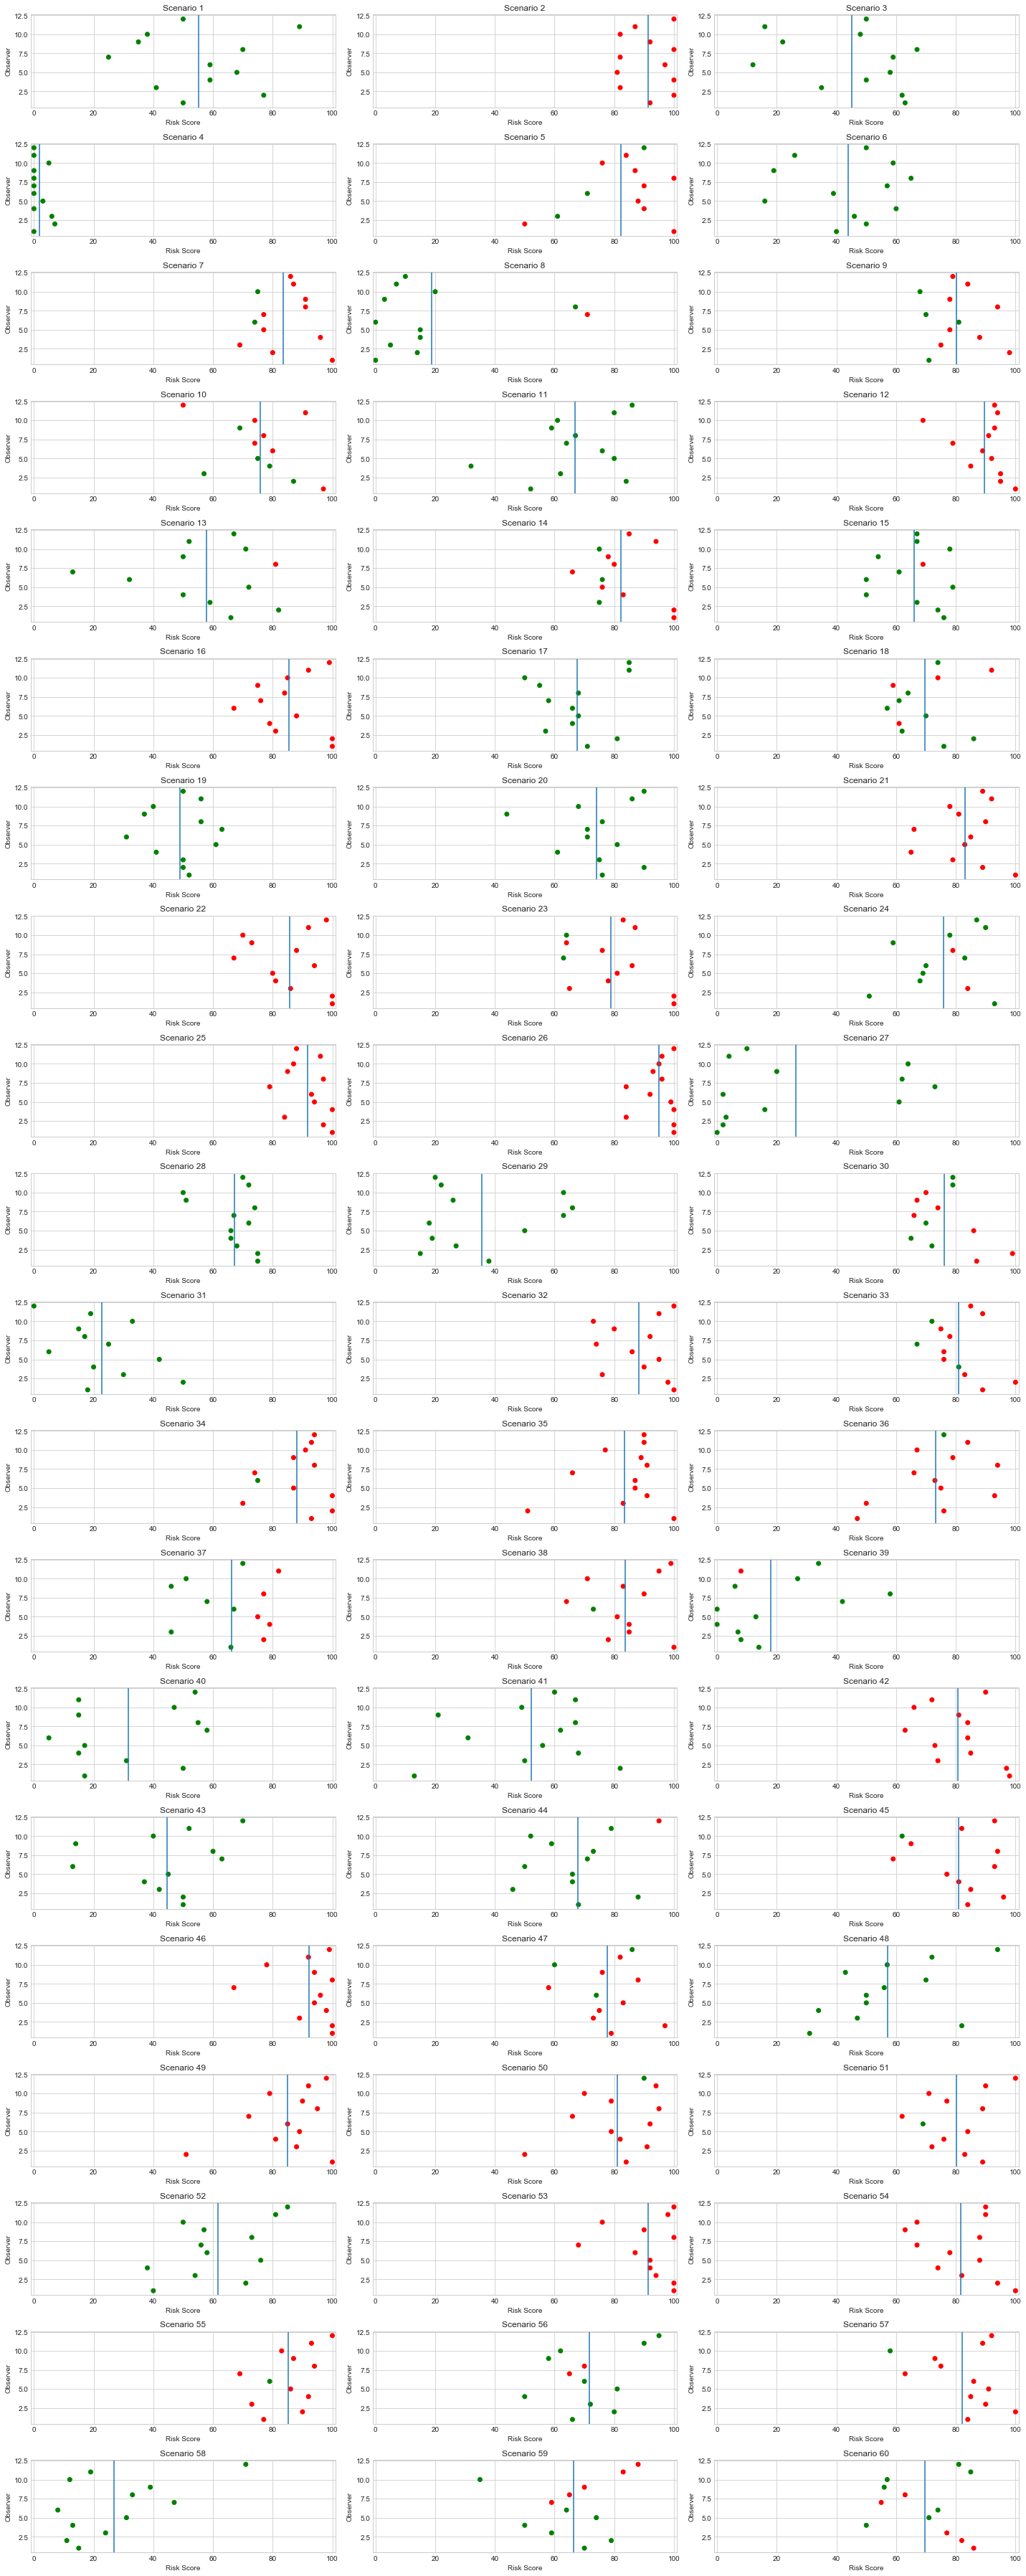

In [9]:
## Plot the results of each scenario plus their mean

plt.rcParams['figure.figsize'] = [20, 50]
fig, axs = plt.subplots(20, 3)
observer = risk.index.values + 1
colors = waitlist
colors[colors == 'Yes'] = 'green'
colors[colors == 'No'] = 'red'

question_number = 0

for i in range(20):
    for j in range(3):
        axs[i, j].set_xlim([-1, 101])
        axs[i, j].scatter(risk[question_number], observer, color=colors[question_number])
        axs[i, j].axvline(x=risk[question_number].mean())
        axs[i, j].set_title(f'Scenario {question_number + 1}')
        axs[i, j].set_ylabel('Observer')
        axs[i, j].set_xlabel('Risk Score')
        question_number += 1
        
plt.tight_layout()

In [10]:
xl = pd.ExcelFile('Survey questions key.xlsx')
survey_key = xl.parse("Sheet1")
survey_key.head()

,Scenario,Output Q No,SRTR Risk,Age,Diagnosis,Blood Group,BMI,PVR,Creat,Bili,Diab,LVAD,ECMO,Vent,Total No Of Risk Factors
0,1,7,15.51,0,0,0,1,0,0,0,1,1,0,0,3
1,2,8,26.40,1,0,0,1,0,1,1,0,0,0,1,5
2,3,9,7.36,0,0,0,0,0,1,0,0,0,0,0,1
3,4,10,4.01,0,0,0,0,0,0,0,0,0,0,0,0
4,5,11,3.67,0,0,0,0,1,0,0,0,0,0,0,1


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,100))
survey_key
#print(scaler.fit(survey_key["SRTR Risk"]))

,Scenario,Output Q No,SRTR Risk,Age,Diagnosis,Blood Group,BMI,PVR,Creat,Bili,Diab,LVAD,ECMO,Vent,Total No Of Risk Factors
0,1,7,15.51,0,0,0,1,0,0,0,1,1,0,0,3
1,2,8,26.40,1,0,0,1,0,1,1,0,0,0,1,5
2,3,9,7.36,0,0,0,0,0,1,0,0,0,0,0,1
3,4,10,4.01,0,0,0,0,0,0,0,0,0,0,0,0
4,5,11,3.67,0,0,0,0,1,0,0,0,0,0,0,1
5,6,12,6.56,0,0,0,0,0,0,0,0,1,0,0,1
6,7,13,15.79,0,0,0,0,1,1,0,1,0,0,1,4
7,8,14,5.31,0,0,1,0,0,0,0,0,0,0,0,1
8,9,15,16.87,1,0,0,1,0,1,0,0,0,0,0,3
9,10,16,12.96,0,0,0,0,0,1,0,0,1,0,0,2


In [12]:
survey_key['SRTR Risk'].reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
## Total sum of squares = Sigma (yi - ymean)^2
tss_noscore = []
print('---------  With Score  ---------')
for scenario in range(30):
    x = risk[scenario]
    x_mean = risk[scenario].mean()
    tss_noscore.append(np.sum((x-x_mean)**2))
    print(f'TSS, Scenario {scenario + 1}:\t{tss_noscore[scenario]}')
    
print('-------  Without Score  --------')
tss_withscore = []
for scenario in range(30):
    x = risk[scenario+30]
    x_mean = risk[scenario+30].mean()
    tss_withscore.append(np.sum((x-x_mean)**2))
    print(f'TSS, Scenario {scenario + 31}:\t{tss_withscore[scenario]}')

In [ ]:
print(f'Total Sum of Squares Mean, No SRTR score:  {np.mean(tss_noscore)}')
print(f'Total Sum of Squares Min, No SRTR score:  {np.min(tss_noscore)}')
print(f'Total Sum of Squares Max, No SRTR score:  {np.max(tss_noscore)}')
print(f'Total Sum of Squares Mean, With SRTR score:  {np.mean(tss_withscore)}')
print(f'Total Sum of Squares Min, With SRTR score:  {np.min(tss_withscore)}')
print(f'Total Sum of Squares Max, With SRTR score:  {np.max(tss_withscore)}')

In [ ]:
## Mean squared errors
mse_noscore = []
print('---------  With Score  ---------')
for scenario in range(30):
    x = risk[scenario]
    x_mean = risk[scenario].mean()
    mse_noscore.append((1/len(x))*np.sum((x-x_mean)**2))
    print(f'MSE, Scenario {scenario + 1}:\t{mse_noscore[scenario]}  (numerator: {np.sum((x-x_mean)**2)}, denominator: {len(x)})')
    
print('-------  Without Score  --------')
mse_withscore = []
for scenario in range(30):
    x = risk[scenario+30]
    x_mean = risk[scenario+30].mean()
    numerator = np.sum((x-x_mean)**2)
    denominator = len(x)
    mse_withscore.append(numerator/denominator)
    print(f'MSE, Scenario {scenario + 31}:\t{mse_withscore[scenario]}  (numerator: {np.sum((x-x_mean)**2)}, denominator: {len(x)})')

In [ ]:
2652.9/np.sum((risk[13]-89.5833333333333)**2)